In [28]:
using  Colors, Images, FileIO, FixedPointNumbers, Plots

Problem 1

In [29]:
struct rgb_value_spec
    rw::Float32
    gw::Float32
    bw::Float32
end

struct hsv_value_spec
    h_degree::Float32
    s::Float32
    v::Float32
end


function filter_RGB(rgb::RGB{N0f8}, rgb_value_spec::rgb_value_spec)
    return RGB{N0f8}(rgb.r * rgb_value_spec.rw, rgb.g * rgb_value_spec.gw, rgb.b*rgb_value_spec.bw)
end

function filter_RGB(rgb::RGB{N0f8}, hsv_value_spec::hsv_value_spec)
    rgb_v = convert(RGB{N0f8},HSV(hsv_value_spec.h_degree,hsv_value_spec.s,hsv_value_spec.v))
    rw = rgb_v.r / 255.0
    bw = rgb_v.b / 255.0
    gw = rgb_v.g / 255.0
    return filter_RGB(rgb, rgb_value_spec(rw,gw,bw))
end

function filter_RGB(rgb::RGB{N0f8},color_s::String)
    if(haskey(Colors.color_names ,color_s))
        r,b,g = Colors.color_names[color_s]
        rw = r / 255.0
        bw = b / 255.0
        gw = g / 255.0
        return filter_RGB(rgb, rgb_value_spec(rw,bw,gw))
    end
end



filter_RGB (generic function with 3 methods)

In [30]:
RGB{N0f8}(35.0/255.0,35.0/255.0,117.0/255.0)

In [31]:
# this works
#hsv1 = convert(HSV,RGB{N0f8}(1,1,1))
convert(RGB{N0f8},HSV(0, 0, 1))


In [32]:
img = load("./VanGogh.jpg");

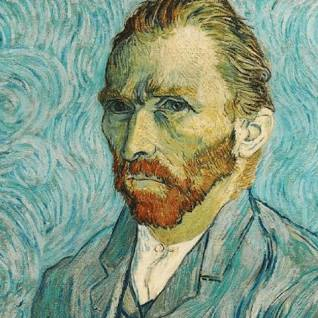

In [33]:
img

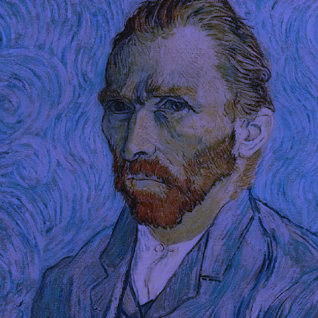

In [34]:
spec = rgb_value_spec(0.5,0.5,1)
filter_RGB.(img, Ref(spec))

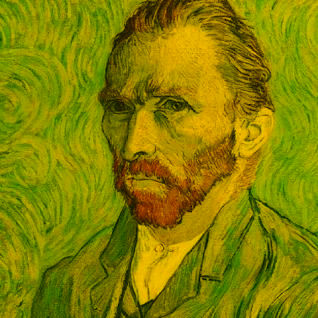

In [35]:
typeof(Colors.color_names)
haskey(Colors.color_names,"blue")
filter_RGB.(img, "gold")

Problem 1.2 

In [36]:
function grayToColor(redPercent::Float64,bluePercent::Float64,greenPercent::Float64, image::Matrix{Gray{N0f8}})
    if(redPercent+bluePercent+greenPercent > 1.0)
        print("RGB percents are greater than 1")
        return
    end

    return RGB_filter.(image,redPercent,greenPercent,bluePercent)
end

function RGB_filter(rgb::Gray{N0f8}, r = 1.0, g = 1.0, b = 1.0)
    RGB{N0f8}(r * rgb, g * rgb, b * rgb)
end

RGB_filter (generic function with 4 methods)

In [37]:
gray_image = load("./lena_gray.png");

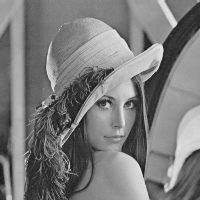

In [38]:
gray_image

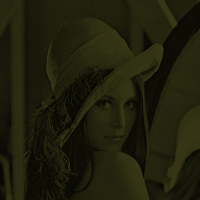

In [39]:
color_iamge = grayToColor(0.25,0.1,0.25,gray_image)

In [40]:
gray_image = load("./cameraman_gray.png");

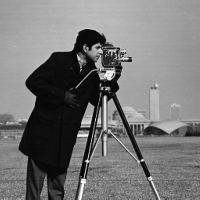

In [41]:
gray_image

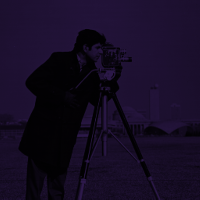

In [42]:
color_iamge = grayToColor(0.18,0.3,0.1,gray_image)

Problem 2

In [45]:
using Colors, ColorSchemes, ColorSchemeTools, Images, FileIO, FixedPointNumbers, Plots

In [57]:
colorschemes[:vangogh].notes

"from artist Vincent Van Gogh's painting The Starry Night, painted in June, 1889, depicting the view from the east-facing window of his asylum room at Saint-Rémy-de-Provence."

In [61]:
stary_night_scheme = colorschemes[:vangogh]

In [62]:
starry_night_extract = extract("starry_night_full.jpg", 30, 50, 0.01)

In [79]:
function compare_colors(color1, color2)
    r1, g1, b1 = red(color1), green(color1), blue(color1)
    r2, g2, b2 = red(sorted_sn_extract[i]), green(sorted_sn_extract[i]), blue(sorted_sn_extract[i])
    if(r1+g1+b1 > r2+g2+b2)
        return true
    end
    return false
end

compare_colors (generic function with 1 method)

In [82]:
sorted_sn_scheme = sort(stary_night_scheme.colors,lt=compare_colors)


In [83]:
sorted_sn_extract = sort(starry_night_extract.colors,lt=compare_colors)

In [90]:
for color in sorted_sn_scheme
    best = 999.99
    closest_color = nothing
    values = (0,0,0)
    r1, g1, b1 = red(sorted_sn_scheme[i]), green(sorted_sn_scheme[i]), blue(sorted_sn_scheme[i])
    for color2 in sorted_sn_extract
        r2, g2, b2 = red(sorted_sn_extract[i]), green(sorted_sn_extract[i]), blue(sorted_sn_extract[i])
        rd = abs(r1-r2)
        gd = abs(g1-g2)
        bd = abs(b1-b2)
        if(rd+gd+bd < best)
            best = rd+gd+bd
            closest_color = color2
            values = (rd,gd,bd)
        end
    end
    println("$color : $closest_color : diff $best : rgb $values")
end

RGB{Float64}(0.9493538255802926,0.9788824950318931,0.8911107310285581) : RGB{Float64}(0.7150465055309545,0.7533512546906761,0.7006726378437526) : diff 0.6502766535753606 : rgb (0.23430732004933807, 0.22553124034121697, 0.19043809318480553)
RGB{Float64}(0.959731486940972,0.9627244597914443,0.7235686748215752) : RGB{Float64}(0.7150465055309545,0.7533512546906761,0.7006726378437526) : diff 0.4769542234886083 : rgb (0.2446849814100175, 0.20937320510076818, 0.02289603697782261)
RGB{Float64}(0.7105809231208425,0.919514337453825,0.9261193665689855) : RGB{Float64}(0.7150465055309545,0.7533512546906761,0.7006726378437526) : diff 0.3960753938984939 : rgb (0.004465582410111968, 0.16616308276314895, 0.22544672872523297)
RGB{Float64}(0.9515717841286133,0.9260476308866568,0.5531104604358869) : RGB{Float64}(0.7542930193197751,0.7461567547128786,0.5167864023478876) : diff 0.4134936990706156 : rgb (0.19727876480883821, 0.1798908761737782, 0.03632405808799921)
RGB{Float64}(0.7692885597283127,0.836247214

In [93]:
for i in 1:length(sorted_sn_scheme)
    best = 999.99
    values = (0,0,0)
    r1, g1, b1 = red(sorted_sn_scheme[i]), green(sorted_sn_scheme[i]), blue(sorted_sn_scheme[i])

    r2, g2, b2 = red(sorted_sn_extract[i]), green(sorted_sn_extract[i]), blue(sorted_sn_extract[i])
    rd = abs(r1-r2)
    gd = abs(g1-g2)
    bd = abs(b1-b2)
    if(rd+gd+bd < best)
        best = rd+gd+bd
        values = (rd,gd,bd)
    end
    println("index $i : diff $best : rgb $values")
end

index 1 : diff 0.6502766535753606 : rgb (0.23430732004933807, 0.22553124034121697, 0.19043809318480553)
index 2 : diff 0.6287884451734501 : rgb (0.20543846762119689, 0.2165677050785657, 0.20678227247368752)
index 3 : diff 0.6160018392086071 : rgb (0.1453366909377688, 0.27261896325213586, 0.19804618501870241)
index 4 : diff 0.6224102492435357 : rgb (0.31983543105073886, 0.24150546035985543, 0.06106935783294143)
index 5 : diff 0.5106285361575815 : rgb (0.12777357535624623, 0.1848479158159112, 0.19800704498542415)
index 6 : diff 0.6209547459347153 : rgb (0.06131744656203825, 0.20599570356094865, 0.3536415958117284)
index 7 : diff 1.076318478834892 : rgb (0.45798568041480825, 0.2982930695095771, 0.32003972891050675)
index 8 : diff 0.48117929450389296 : rgb (0.09131788757878301, 0.20809397722218692, 0.18176742970292303)
index 9 : diff 0.4401472947346225 : rgb (0.039541258636130616, 0.18274829025541472, 0.21785774584307716)
index 10 : diff 0.4923192771129974 : rgb (0.2359666138528369, 0.1796

2.3

In [94]:
function mandelbrot(x, y)
    z = c = x + y*im
    for i in 1:100.0 
        abs(z) > 2 && return i 
        z = z^2 + c; 
    end; 
    0
end

mandelbrot (generic function with 1 method)

In [110]:
x = LinRange(-1.5, -1, 1000)
y = LinRange(-.5, .5, 1000)
matrix = mandelbrot.(x, y');

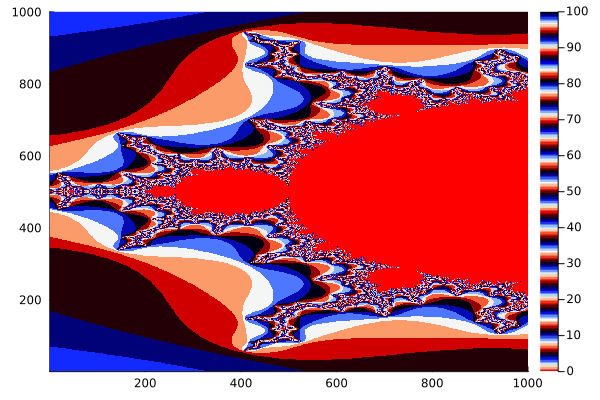

In [111]:
Plots.heatmap(1:size(matrix,2),1:size(matrix,1), matrix', 
    color = :flag)

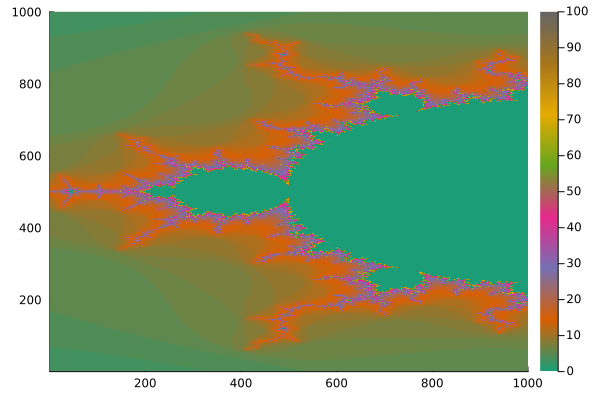

In [112]:
Plots.heatmap(1:size(matrix,2),1:size(matrix,1), matrix', color =:Dark2_8)

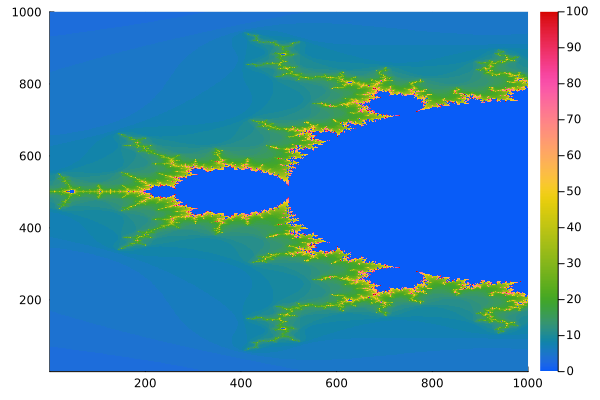

In [113]:
Plots.heatmap(1:size(matrix,2),1:size(matrix,1), matrix', color =:diverging_rainbow_bgymr_45_85_c67_n256)